In [1]:
#!/usr/bin/env python
# coding: utf-8
get_ipython().run_line_magic('pylab', 'inline')
import nibabel as nib
import json
from skimage.draw import ellipse

with open('./sample.json') as f:
    electrode_data = json.load(f)

number_of_electrodes = len(electrode_data['elecID'])

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Electrode:
    def __init__(self, xCoor, yCoor, zCoor):
        self.xCoor = xCoor
        self.yCoor = yCoor
        self.zCoor = zCoor
        

electrode_objects = []
for index in range(number_of_electrodes):
    xCoor = electrode_data['coorX'][index]
    yCoor = electrode_data['coorY'][index]
    zCoor = electrode_data['coorZ'][index]
    electrode_objects.append(Electrode(xCoor, yCoor, zCoor))
    


In [3]:
def map_interval(input_val, input_range, output_range):
    (input_start, input_end) = input_range
    (output_start, output_end) = output_range
    
    return output_start + ((output_end - output_start) / (input_end - input_start)) * (input_val - input_start)

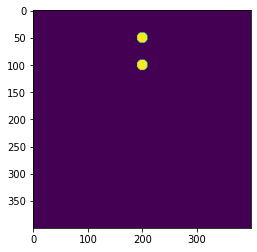

In [4]:
#vol = './T1.nii'

#volume = nib.load(vol)
labels = np.zeros((400, 400), dtype=np.uint8)
rr, cc = ellipse(100, 200, 10, 10, shape=None, rotation=0.0);
rr1, cc1 = ellipse(50, 200, 10, 10, shape=None, rotation=0.0);
labels[rr, cc] = 1
labels[rr1, cc1] = 1
labels

plt.imshow(labels)

#labels = np.zeros((volume.shape[0], volume.shape[1], volume.shape[2]), dtype=np.uint8)


#r = 3 # maybe switch to scikit image draw

#for electrode in electrode_objects:
        
    #first_interval = (-127.5, 127.5)
    #second_interval = (0, 255)
    #mapped_xCoor = int(round(map_interval(electrode.xCoor, first_interval, second_interval)))
    #mapped_yCoor = int(round(map_interval(electrode.yCoor, first_interval, second_interval)))
    #mapped_zCoor = int(round(map_interval(electrode.zCoor, first_interval, second_interval)))
    
    #Labels[mapped_xCoor:mapped_xCoor+r, mapped_yCoor:mapped_yCoor+r, mapped_zCoor:mapped_zCoor+r] = 1
    #ellipse(r, c, r_radius, c_radius, shape=None, rotation=0.0)
    
    #rr, cc =  ellipse( 0, 0, 3, 3, shape=None, rotation=0.0)
    #labels[rr, cc] = 1

# store the labelmap
#labelmap = nib.Nifti1Image(labels, volume.affine)
#nib.save(labelmap, 'labels.nii')

#volume.affine

In [5]:
vol = './T1.nii'

volume = nib.load(vol)

labels = np.zeros((volume.shape[0], volume.shape[1], volume.shape[2]), dtype=np.uint8)
labels.shape

for electrode in electrode_objects:
        
    first_interval = (-127.5, 127.5)
    second_interval = (0, 255)
    mapped_xCoor = int(round(map_interval(electrode.xCoor, first_interval, second_interval)))
    mapped_yCoor = int(round(map_interval(electrode.yCoor, first_interval, second_interval)))
    mapped_zCoor = int(round(map_interval(electrode.zCoor, first_interval, second_interval)))
    
    #Labels[mapped_xCoor:mapped_xCoor+r, mapped_yCoor:mapped_yCoor+r, mapped_zCoor:mapped_zCoor+r] = 1
    
    rr, cc = ellipse(100, 200, 3, 3, shape=None, rotation=0.0)
    labels[rr, cc] = 1
    
    #rr, cc =  ellipse( 0, 0, 3, 3, shape=None, rotation=0.0)
    #labels[rr, cc] = 1
    
# store the labelmap
labelmap = nib.Nifti1Image(labels, volume.affine)
nib.save(labelmap, 'labels.nii')

volume.affine

array([[  -1.,    0.,    0.,  128.],
       [   0.,    0.,    1., -128.],
       [   0.,   -1.,    0.,  128.],
       [   0.,    0.,    0.,    1.]])